Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [4]:
import pandas as pd
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
##Handling missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Observation:-The dataset has no missing values

#Encoding categorical variable
Observation:-The Dataset has no categorical features

In [6]:
#indipendent and dependent data
X=df.iloc[:,:-1]
y=df.target

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [9]:
#train , test classification
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,max_depth=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [11]:
y_pred=classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8241758241758241
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
importance=classifier.feature_importances_

In [15]:
# Get the indices of the top 5 features based on importance scores
top_5_indices=np.argsort(importance)[-5:]

In [16]:
# Get the names of the top 5 features
top5_features = df.columns[top_5_indices]

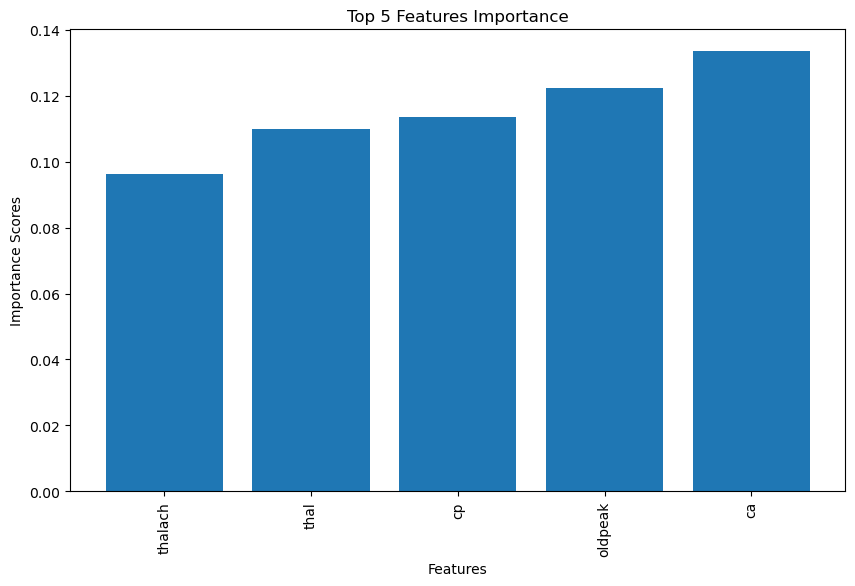

In [17]:
# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(top5_features)), importance[top_5_indices])
plt.xticks(range(len(top5_features)), top5_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Top 5 Features Importance')
plt.show()

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [18]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their possible values to search
param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}
# Create a random forest classifier object
rf_classifier=RandomForestClassifier()
# Perform grid search with 5-fold cross-validation
grid_search=GridSearchCV(rf_classifier,param_grid,cv=5)
# Fit the grid search object to the training data
grid_search.fit(X_train,y_train)
# Fit the grid search object to the training data
best_params=grid_search.best_params_

In [19]:
# Create a new random forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
# Fit the best classifier to the training set
best_rf_classifier.fit(X_train, y_train)

# Predict labels for the test set using the best classifier
y_pred = best_rf_classifier.predict(X_test)

# Evaluate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters and corresponding performance metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7912087912087912
Precision: 0.8163265306122449
Recall: 0.8
F1 Score: 0.8080808080808082


Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [20]:
# Create a default random forest classifier
default_rf_classifier = RandomForestClassifier()

# Fit the default classifier to the training set
default_rf_classifier.fit(X_train, y_train)

# Predict labels for the test set using the default classifier
default_y_pred = default_rf_classifier.predict(X_test)

# Evaluate performance metrics for the default classifier
default_accuracy = accuracy_score(y_test, default_y_pred)
default_precision = precision_score(y_test, default_y_pred)
default_recall = recall_score(y_test, default_y_pred)
default_f1 = f1_score(y_test, default_y_pred)

# Print the best hyperparameters found by the search
print("Best Hyperparameters:", best_params)

# Print the performance metrics for the tuned model
print("Tuned Model - Accuracy:", accuracy)
print("Tuned Model - Precision:", precision)
print("Tuned Model - Recall:", recall)
print("Tuned Model - F1 Score:", f1)

# Print the performance metrics for the default model
print("Default Model - Accuracy:", default_accuracy)
print("Default Model - Precision:", default_precision)
print("Default Model - Recall:", default_recall)
print("Default Model - F1 Score:", default_f1)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Model - Accuracy: 0.7912087912087912
Tuned Model - Precision: 0.8163265306122449
Tuned Model - Recall: 0.8
Tuned Model - F1 Score: 0.8080808080808082
Default Model - Accuracy: 0.8021978021978022
Default Model - Precision: 0.82
Default Model - Recall: 0.82
Default Model - F1 Score: 0.82


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#decision boundries
import pandas as pd
df=pd.read_csv('dataset.csv')
import matplotlib.pyplot as plt
import numpy as np
#selecting two most important feature
feature1 = 'age'
feature2 = 'chol'

# Get the indices of the selected features
feature1_idx = np.where(df.columns == feature1)[0][0]
feature2_idx = np.where(df.columns == feature2)[0][0]


# Get the minimum and maximum values of the selected features from the training set
feature1_min = X_train[:, feature1_idx].min() - 1
feature1_max = X_train[:, feature1_idx].max() + 1
feature2_min = X_train[:, feature2_idx].min() - 1
feature2_max = X_train[:, feature2_idx].max() + 1

# Generate a grid of points within the feature ranges
grid_feature1, grid_feature2 = np.meshgrid(
    np.arange(feature1_min, feature1_max, 0.1),
    np.arange(feature2_min, feature2_max, 0.1)
)

# Flatten the grid points into feature vectors
grid_points = np.c_[grid_feature1.ravel(), grid_feature2.ravel()]

# Use the trained random forest classifier to predict labels for the grid points
grid_predictions = best_rf_classifier.predict(grid_points)

# Reshape the predictions to match the grid shape
grid_predictions = grid_predictions.reshape(grid_feature1.shape)

# Create a scatter plot of the two selected features
plt.scatter(X_train[:, feature1_idx], X_train[:, feature2_idx], c=y_train, cmap='coolwarm', edgecolor='k')
plt.xlabel(feature1)
plt.ylabel(feature2)

# Plot the decision boundaries on the scatter plot
plt.contourf(grid_feature1, grid_feature2, grid_predictions, alpha=0.4, cmap='coolwarm')
plt.colorbar(label='Predicted Label')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()

##Trying from 30 minutes still getting this error 

InvalidIndexError: (slice(None, None, None), 0)